<a href="https://colab.research.google.com/github/anhphuong012/TieuLuan/blob/main/Data_set_MNIST_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import thư viện cần thiết
import numpy as np
import pandas as pd
import os
import torch
from torch import nn
import torchvision
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import tensorflow as tf
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.losses import SparseCategoricalCrossentropy
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import SGD

from prettytable import PrettyTable

**Đọc dữ liệu**

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()



4422102/4422102 [==============================] - 0s 0us/step


**Xử lí dữ liệu**

In [ ]:



# Chuẩn hóa dữ liệu
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

#Convert dữ liệu dạng vector sang binary (One hot coding)
num_classes=10
y_train_encoded=to_categorical(y_train,num_classes)
y_test_encoded=to_categorical(y_test,num_classes)

x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Hiển thị 10 hình đầu của tập train

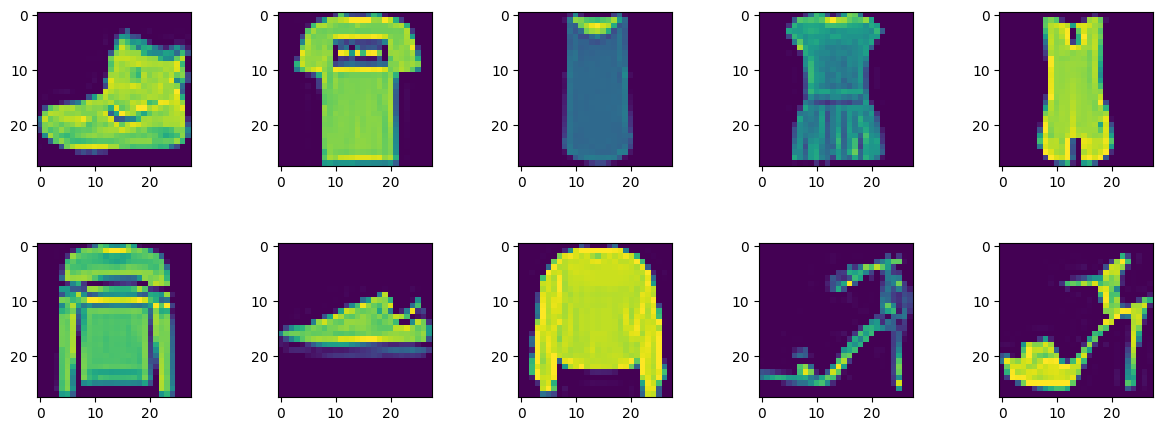

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(x_train[i])

plt.subplots_adjust(hspace=0.5)
plt.show()

**Reshape lại dữ liệu để train model KNN,RandomForestClassifier,DecisionTreeClassifier**



In [ ]:
X_train_reshaped=x_train.reshape(60000,784)
X_test_reshaped=x_test.reshape(10000,784)



***Train mô hình với KNN***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors' : [5,7,9],
    'weights' : ['uniform','distance'],
    'metric' : ['minkowski','euclidean']

}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn,param_grid=param_grid,scoring="accuracy",refit=True,return_train_score=True)


grid_search.fit(X_train_reshaped,y_train_encoded)
y_pre = grid_search.predict(X_test_reshaped)

np.asarray(y_test)

print(grid_search.best_params_)
accuracy_knm = accuracy_score(y_test,y_pre)
pre_knm =precision_score(y_test,y_pre,average="macro")
recall_knm = recall_score(y_test,y_pre,average="macro")
f1_knm = f1_score(y_test,y_pre,average="macro")

print("Accuracy:" + str(accuracy_knm))
print("Precision:" +str(pre_knm ))
print("Recall:" + str(recall_knm))
print("F1:" + str(f1_knm))

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
Accuracy:0.8389
Precision:0.8726877505717405
Recall:0.8389
F1:0.8536246896142492


***Train mô hình với Random Forest***

In [ ]:

from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [25,75],
    'max_features': [ 'log2', None],
    'max_depth': [6,9],
    'max_leaf_nodes': [ 12,14],
}
random = RandomForestClassifier()
grid_search = GridSearchCV(estimator=random,param_grid=param_grid,scoring="accuracy",refit=True,return_train_score=True)

grid_search.fit(X_train_reshaped,y_train)
y_pre = grid_search.predict(X_test_reshaped)

print(grid_search.best_params_)
accuracy_rd = accuracy_score(y_test,y_pre)
pre_rd =precision_score(y_test,y_pre,average="micro")
recall_rd = recall_score(y_test,y_pre,average="macro")
f1_rd = f1_score(y_test,y_pre,average="macro")

print("Accuracy:" + str(accuracy_rd))
print("Precision:" +str(pre_rd ))
print("Recall:" + str(recall_rd))
print("F1:" + str(f1_rd))


{'max_depth': 9, 'max_features': 'log2', 'max_leaf_nodes': 14, 'n_estimators': 25}
Accuracy:0.734
Precision:0.734
Recall:0.7339999999999999
F1:0.7047197445783534


***Train mô hình với Decision Tree***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_features': [ 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5,  7, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train_reshaped, y_train)

y_pre = grid_search.predict(X_test_reshaped)

print(grid_search.best_params_)
accuracy_desion = accuracy_score(y_test,y_pre)
pre_desion =precision_score(y_test,y_pre,average="macro")
recall_desion = recall_score(y_test,y_pre,average="macro")
f1_desion = f1_score(y_test,y_pre,average="micro")

print("Accuracy:" + str(accuracy_desion))
print("Precision:" +str(pre_desion ))
print("Recall:" + str(recall_desion))
print("F1:" + str(f1_desion))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt'}
Accuracy:0.7603
Precision:0.764774005115666
Recall:0.7603000000000001
F1:0.7602999999999999


**Xử Lí dữ liệu cho mô hình CNN với fine tune**

In [ ]:
from tensorflow import keras
import numpy as np
import cv2
import tensorflow as tf
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Activation, Dense, Input





print("x_train shape:", np.asarray(x_train).shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# Convert dữ liệu sang kích thước (64,64,3) để phù hợp áp dụng fine tune
X_train=[ cv2.cvtColor(cv2.resize(i,(64,64),interpolation=cv2.INTER_AREA),cv2.COLOR_GRAY2RGB) for i in x_train]


print("x_train shape:", np.asarray(X_train).shape)
X_test=[ cv2.cvtColor(cv2.resize(i,(64,64),interpolation=cv2.INTER_AREA),cv2.COLOR_GRAY2RGB) for i in x_test]



# print("x_train shape:", np.asarray(X_train).shape)

# print("x_test shape:", np.asarray(X_test).shape)




x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
x_train shape: (60000, 64, 64, 3)


**Tải mô hình VGG16 Pre-trained**

In [ ]:

#Fine tune

image_input = tf.keras.layers.Input(shape=(64,64, 3))

#Tạo mô hình cơ sở VGG-16 với trọng số imagenet
baseModel_VGG_16 = tf.keras.applications.VGG16(include_top=False,weights='imagenet',input_tensor=image_input)



# Đóng băng các lớp cơ sở
for i in baseModel_VGG_16.layers:
    i.trainable=False
# In model summary


# # Tinh chỉnh một số lớp cuối cùng của mô hình VGG16
for layer in baseModel_VGG_16.layers[-2:]:
    layer.trainable = True
baseModel_VGG_16.summary()


# for i in baseModel_VGG_16.layers:
#     i.trainable=True




Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     



**Train mô hình CNN không sử dụng Attention**



In [ ]:
from tensorflow.keras.layers import Attention, GlobalAveragePooling2D,AveragePooling2D
base = baseModel_VGG_16.output




maxpool1 = MaxPooling2D(pool_size = (2, 2), strides=(2, 2))(baseModel_VGG_16.output)





FC_layer_Flatten = tf.keras.layers.Flatten()(maxpool1)
TOP_FC = tf.keras.layers.Dropout(0.5)(FC_layer_Flatten)
Dense=tf.keras.layers.Dense(units=1000,activation='relu')(TOP_FC)
Dense=tf.keras.layers.Dense(units=800,activation='relu')(Dense)
Dense=tf.keras.layers.Dense(units=400,activation='relu')(Dense)
Dense=tf.keras.layers.Dense(units=200,activation='relu')(Dense)
Dense=tf.keras.layers.Dense(units=100,activation='relu')(Dense)

Classification=tf.keras.layers.Dense(units=10,activation='softmax')(Dense)

In [ ]:
model_final_cnn = tf.keras.Model(inputs=image_input,outputs=Classification)

#In  Model Summary
model_final_cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
base_learning_rate = 0.0001




model_final_cnn.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
#Train mô hình
history_cnn = model_final_cnn.fit(np.asarray(X_train),y_train_encoded,validation_split=0.1,epochs=10,batch_size=32)

Epoch 1/10
1561/1561 [==============================] - 43s 23ms/step - loss: 0.6268 - accuracy: 0.7756 - val_loss: 0.3869 - val_accuracy: 0.8569
Epoch 2/10
1561/1561 [==============================] - 32s 21ms/step - loss: 0.3753 - accuracy: 0.8630 - val_loss: 0.3392 - val_accuracy: 0.8732
Epoch 3/10
1561/1561 [==============================] - 34s 22ms/step - loss: 0.3326 - accuracy: 0.8791 - val_loss: 0.3055 - val_accuracy: 0.8932
Epoch 4/10
1561/1561 [==============================] - 32s 21ms/step - loss: 0.3094 - accuracy: 0.8862 - val_loss: 0.2876 - val_accuracy: 0.8926
Epoch 5/10
1561/1561 [==============================] - 32s 21ms/step - loss: 0.2909 - accuracy: 0.8923 - val_loss: 0.2879 - val_accuracy: 0.8978
Epoch 6/10
1561/1561 [==============================] - 35s 22ms/step - loss: 0.2790 - accuracy: 0.8970 - val_loss: 0.2811 - val_accuracy: 0.8957
Epoch 7/10
1561/1561 [==============================] - 32s 20ms/step - loss: 0.2725 - accuracy: 0.9006 - val_loss: 0.2632 -

In [ ]:
# Dự đoán nhãn cho dữ liệu kiểm định hoặc thử nghiệm
y_pre = model_final_cnn.predict(np.asarray(X_test))
# Chuyển đổi dự đoán từ dạng xác suất  thành nhãn thực tế
Y_pred_classes = tf.argmax(y_pre, axis=1).numpy()

y_test = np.argmax(y_test_encoded, axis=1)
accuracy_cnn = accuracy_score(np.asarray(y_test),Y_pred_classes)
pre_cnn =precision_score(np.asarray(y_test),Y_pred_classes,average="weighted")
recall_cnn = recall_score(np.asarray(y_test),Y_pred_classes,average="weighted")
f1_cnn = f1_score(np.asarray(y_test),Y_pred_classes,average="weighted")

print("Accuracy:" + str(accuracy_cnn))
print("Precision:" +str(pre_cnn ))
print("Recall:" + str(recall_cnn))
print("F1:" + str(f1_cnn))

313/313 [==============================] - 6s 17ms/step
Accuracy:0.8984
Precision:0.9000862716039386
Recall:0.8984
F1:0.8958557510960254


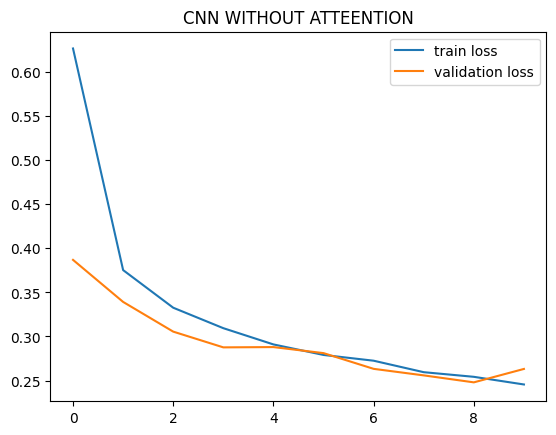

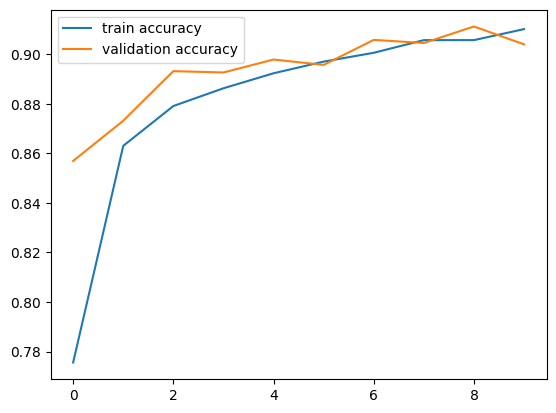

In [ ]:
plt.title('CNN WITHOUT ATTEENTION')
# plot the loss value
plt.plot(history_cnn.history['loss'], label='train loss')
plt.plot(history_cnn.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(history_cnn.history['accuracy'], label='train accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='validation accuracy')
plt.legend()

plt.show()

**Train mô hình với CNN sử dụng cơ chế Attention**

In [ ]:
from tensorflow.keras.layers import Attention, GlobalMaxPooling2D,AveragePooling2D,AdditiveAttention,Concatenate,MultiHeadAttention, LayerNormalization
import random
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Layer, Permute,Add,concatenate
from tensorflow.keras.layers import add
from tensorflow.keras.layers import Conv2D, Dense, GlobalAveragePooling2D, GlobalMaxPooling2D, Input, Layer, Reshape, multiply, add, Activation, Flatten,Multiply

# Định nghĩa CBAM
def cbam_block(input_tensor, ratio=16):
    """Contains the implementation of Convolutional Block Attention Module(CBAM) block."""
    # Channel attention module
    channel = channel_attention(input_tensor, ratio)
    # Spatial attention module
    spatial = spatial_attention(channel)
    return spatial

def channel_attention(input_tensor, ratio=16):
    channel_axis = 1 if tf.keras.backend.image_data_format() == "channels_first" else -1
    channel = input_tensor.shape[channel_axis]

    shared_layer_one = Dense(channel // ratio,
                             activation='relu',
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')
    shared_layer_two = Dense(channel ,
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')

    avg_pool = GlobalAveragePooling2D()(input_tensor)
    avg_pool = Reshape((1, 1, channel))(avg_pool)
    avg_pool = shared_layer_one(avg_pool)
    avg_pool = shared_layer_two(avg_pool)

    max_pool = GlobalMaxPooling2D()(input_tensor)
    max_pool = Reshape((1, 1, channel))(max_pool)
    max_pool = shared_layer_one(max_pool)
    max_pool = shared_layer_two(max_pool)

    cbam_feature = Add()([avg_pool, max_pool])
    cbam_feature = Activation('sigmoid')(cbam_feature)

    return Multiply()([input_tensor, cbam_feature])

def spatial_attention(input_tensor):
    kernel_size =7
    if tf.keras.backend.image_data_format() == "channels_first":
        channel = input_tensor.shape[1]
        cbam_feature = Permute((2, 3, 1))(input_tensor)
    else:
        channel = input_tensor.shape[-1]
        cbam_feature = input_tensor

    avg_pool = tf.reduce_mean(cbam_feature, axis=-1, keepdims=True)
    max_pool = tf.reduce_max(cbam_feature, axis=-1, keepdims=True)
    concat = tf.concat([avg_pool, max_pool], axis=-1)
    cbam_feature = Conv2D(filters=1,
                          kernel_size=kernel_size,
                          strides=1,
                          padding='same',
                          activation='sigmoid',
                          kernel_initializer='he_normal',
                          use_bias=False)(concat)

    if tf.keras.backend.image_data_format() == "channels_first":
        cbam_feature = Permute((3, 1, 2))(cbam_feature)

    return Multiply()([input_tensor, cbam_feature])





x = baseModel_VGG_16.get_layer("block5_conv3").output
x = cbam_block(x,ratio =12)
# pool = baseModel_VGG_16.get_layer("block5_pool").output

# for layer in baseModel_VGG_16.layers:
#     x = layer(x)
#     if layer.name in ['block4_conv3',  'block5_conv3']:
#         x = cbam_block(x)


x = MaxPooling2D(pool_size = (2, 2), strides=(2, 2))(x)
# x = GlobalAveragePooling2D()(x)
FC_layer_Flatten = tf.keras.layers.Flatten()(x)
TOP_FC = tf.keras.layers.Dropout(0.5)(FC_layer_Flatten)
Dense=tf.keras.layers.Dense(units=1000,activation='relu')(TOP_FC)
Dense=tf.keras.layers.Dense(units=800,activation='relu')(Dense)
Dense=tf.keras.layers.Dense(units=400,activation='relu')(Dense)
Dense=tf.keras.layers.Dense(units=200,activation='relu')(Dense)
Dense=tf.keras.layers.Dense(units=100)(Dense)
Classification=tf.keras.layers.Dense(units=10,activation='softmax')(Dense)




In [ ]:
base_learning_rate = 0.0001




model_final.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
#Train mô hình
history_att = model_final.fit(np.asarray(X_train),y_train_encoded,validation_split=0.1,epochs=10,batch_size=32)

Epoch 1/10
1561/1561 [==============================] - 48s 25ms/step - loss: 0.5986 - accuracy: 0.7870 - val_loss: 0.3853 - val_accuracy: 0.8541
Epoch 2/10
1561/1561 [==============================] - 38s 25ms/step - loss: 0.3549 - accuracy: 0.8716 - val_loss: 0.3426 - val_accuracy: 0.8751
Epoch 3/10
1561/1561 [==============================] - 39s 25ms/step - loss: 0.3132 - accuracy: 0.8857 - val_loss: 0.2924 - val_accuracy: 0.8942
Epoch 4/10
1561/1561 [==============================] - 36s 23ms/step - loss: 0.2891 - accuracy: 0.8929 - val_loss: 0.2739 - val_accuracy: 0.9016
Epoch 5/10
1561/1561 [==============================] - 36s 23ms/step - loss: 0.2747 - accuracy: 0.8986 - val_loss: 0.2848 - val_accuracy: 0.8989
Epoch 6/10
1561/1561 [==============================] - 38s 24ms/step - loss: 0.2583 - accuracy: 0.9051 - val_loss: 0.2791 - val_accuracy: 0.8953
Epoch 7/10
1561/1561 [==============================] - 36s 23ms/step - loss: 0.2473 - accuracy: 0.9090 - val_loss: 0.2710 -

In [ ]:
model_final = tf.keras.Model(inputs=baseModel_VGG_16.input,outputs=Classification)
model_final.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 64, 64, 64)           1792      ['input_1[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 64, 64, 64)           36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)           0         ['block1_conv2[0][0]']        
                                                                                              

In [ ]:



# Dự đoán nhãn cho dữ liệu kiểm định hoặc thử nghiệm
y_pre = model_final.predict(np.asarray(X_test))
# Chuyển đổi dự đoán từ dạng xác suất  thành nhãn thực tế
Y_pred_classes = tf.argmax(y_pre, axis=1).numpy()

y_test = np.argmax(y_test_encoded, axis=1)
accuracy_att = accuracy_score(np.asarray(y_test),Y_pred_classes)
pre_att =precision_score(np.asarray(y_test),Y_pred_classes,average="weighted")
recall_att = recall_score(np.asarray(y_test),Y_pred_classes,average="weighted")
f1_att = f1_score(np.asarray(y_test),Y_pred_classes,average="weighted")

print("Accuracy:" + str(accuracy_att))
print("Precision:" +str(pre_att ))
print("Recall:" + str(recall_att))
print("F1:" + str(f1_att))

313/313 [==============================] - 6s 19ms/step
Accuracy:0.9066
Precision:0.9070309661194959
Recall:0.9066
F1:0.9065754422275353


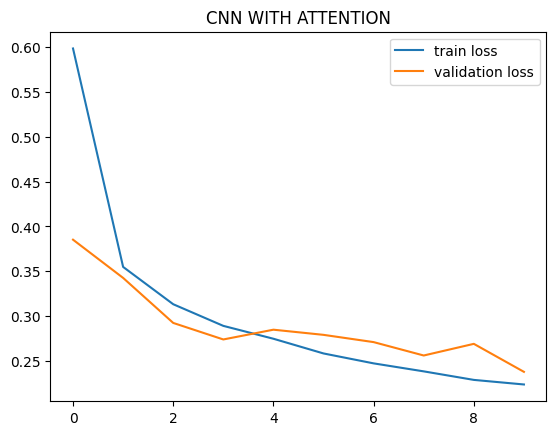

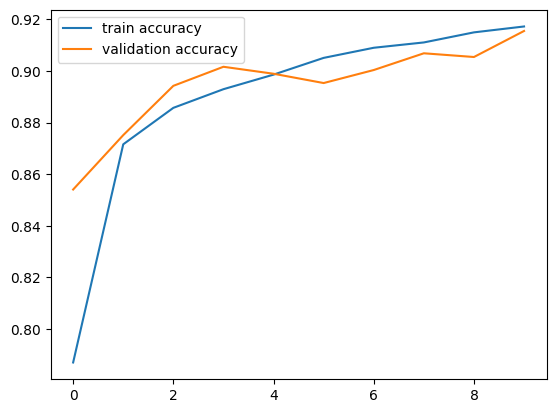

In [ ]:
plt.title('CNN WITH ATTENTION')
# plot the loss value
plt.plot(history_att.history['loss'], label='train loss')
plt.plot(history_att.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(history_att.history['accuracy'], label='train accuracy')
plt.plot(history_att.history['val_accuracy'], label='validation accuracy')
plt.legend()

plt.show()

**So sánh với các thuật toán**

In [ ]:
t = PrettyTable(["Algorithms","Accuracy","Precision","Recall","F1"])
t.add_row(['KNN.',round(accuracy_knm,4),round(pre_knm,4),round(recall_knm,4),round(f1_knm,4)])
t.add_row(['RandomForest',round(accuracy_rd,4),round(pre_rd,4),round(recall_rd,4),round(f1_rd,4)])
t.add_row(['DecisionTree',round(accuracy_desion,4),round(pre_desion,4),round(recall_desion,4),round(f1_desion,4)])
t.add_row(['CNN Without Attention',round(accuracy_cnn,4),round(pre_cnn,4),round(recall_cnn,4),round(f1_cnn,4)])
t.add_row(['CNN With Attention',round(accuracy_att,4),round(pre_att,4),round(recall_att,4),round(f1_att,4)])
print(t)

+-----------------------+----------+-----------+--------+--------+
|       Algorithms      | Accuracy | Precision | Recall |   F1   |
+-----------------------+----------+-----------+--------+--------+
|          KNN.         |  0.8389  |   0.8727  | 0.8389 | 0.8536 |
|      RandomForest     |  0.734   |   0.734   | 0.734  | 0.7047 |
|      DecisionTree     |  0.7603  |   0.7648  | 0.7603 | 0.7603 |
| CNN Without Attention |  0.8984  |   0.9001  | 0.8984 | 0.8959 |
|   CNN With Attention  |  0.9066  |   0.907   | 0.9066 | 0.9066 |
+-----------------------+----------+-----------+--------+--------+
